In [1]:
import geopandas
from geopandas import read_file

In [2]:
import mapclassify
mapclassify.__version__

'2.4.3'

In [4]:
import libpysal
libpysal.__version__

'4.6.2'

In [5]:
libpysal.examples.available()

Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals



Bad key text.latex.preview in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       

,Name,Description,Installed
0,10740,"Albuquerque, New Mexico, Census 2000 Tract Dat...",True
1,AirBnB,"Airbnb rentals, socioeconomics, and crime in C...",True
2,Atlanta,"Atlanta, GA region homicide counts and rates",True
3,Baltimore,Baltimore house sales prices and hedonics,True
4,Bostonhsg,Boston housing and neighborhood data,True
...,...,...,...
93,taz,Traffic Analysis Zones in So. California,True
94,tokyo,Tokyo Mortality data,True
95,us_income,Per-capita income for the lower 48 US states 1...,True
96,virginia,Virginia counties shapefile,True


In [6]:
_ = libpysal.examples.load_example('South')
pth = libpysal.examples.get_path('south.shp')

In [7]:
df = read_file(pth)

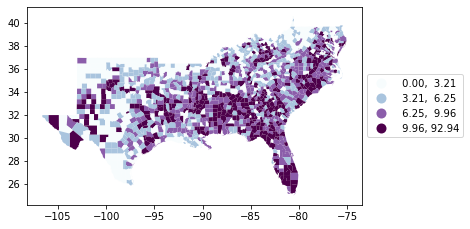

In [8]:
%matplotlib inline
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

In [9]:
labels = [t.get_text() for t in ax.get_legend().get_texts()]
labels

[' 0.00,  3.21', ' 3.21,  6.25', ' 6.25,  9.96', ' 9.96, 92.94']

In [10]:
q4 = mapclassify.Quantiles(df.HR60, k=4)
q4

Quantiles             

   Interval      Count
----------------------
[ 0.00,  3.21] |   353
( 3.21,  6.25] |   353
( 6.25,  9.96] |   353
( 9.96, 92.94] |   353

In [11]:
labels == q4.get_legend_classes()


False

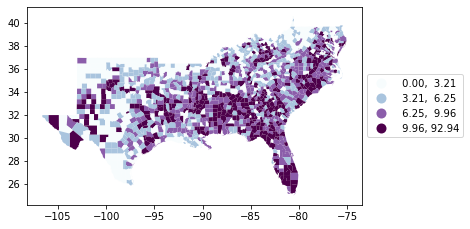

In [12]:
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)},
          )

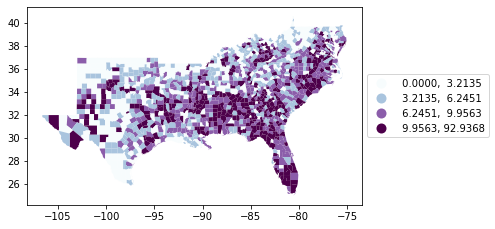

In [13]:
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),  'fmt':"{:.4f}"})

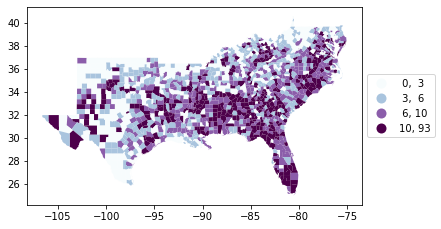

In [14]:
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),  'fmt':"{:.0f}"})

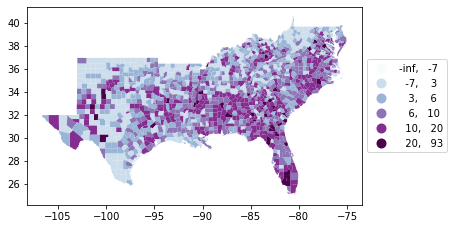

In [15]:
ax = df.plot(column='HR60', scheme='BoxPlot', \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"})

In [16]:
bp = mapclassify.BoxPlot(df.HR60)
bp

BoxPlot               

   Interval      Count
----------------------
( -inf, -6.90] |     0
(-6.90,  3.21] |   353
( 3.21,  6.25] |   353
( 6.25,  9.96] |   353
( 9.96, 20.07] |   311
(20.07, 92.94] |    42

In [17]:
bp.get_legend_classes(fmt="{:.0f}")

['(-inf,   -7]',
 '(  -7,    3]',
 '(   3,    6]',
 '(   6,   10]',
 '(  10,   20]',
 '(  20,   93]']

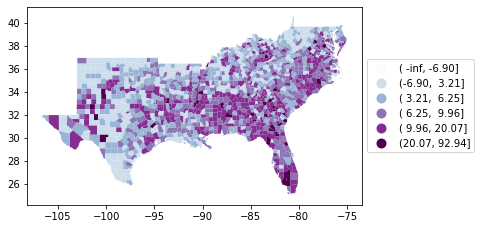

In [18]:
ax = df.plot(column='HR60', scheme='BoxPlot', \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'interval': True})

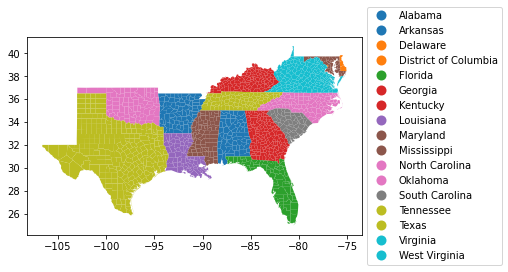

In [19]:
ax = df.plot(column='STATE_NAME', categorical=True, legend=True, \
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"}) # fmt is ignored for categorical data